This notebook will go over some of the fundamental concepts of vectors, and ultimately introduce the terminology and concepts for comparing and manipulating sets of vectors. For some additional information and useful graphics, see also the ['essence of linear algebra'](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) youtube videos by 3Blue1Brown

### Load libraries and setup plotting function

In [2]:
import numpy as np #the most common python library for doing linear algebra
import matplotlib.pyplot as plt #plotting library

def plot_setup(ax,xlim=[-2,4],ylim=[-2,4],xcoords=[1,0.4],ycoords=[0.4,0.95]): 
    #setting up the plotting environment in advance
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.grid(True,alpha=.3)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks(np.arange(xlim[0],xlim[1]+1, 1))
    ax.set_yticks(np.arange(ylim[0], ylim[1]+1, 1))
    ax.set_xlabel('$x_1$',fontsize=12)
    ax.set_ylabel('$x_2$',rotation=0,labelpad=15,fontsize=12)
    ax.xaxis.set_label_coords(xcoords[0],xcoords[1])
    ax.yaxis.set_label_coords(ycoords[0],ycoords[1])
    return ax

### Scalars

Just to make sure we define all the notation and terminology in advance; a *scalar* value is considered to be a single, or stand-alone, number. For example the the number 2 is an *integer* scalar (integer because it has no decimal precision), while the number 2.3 is a floating point value/scalar (i.e., a fraction). It is very common to refer to integer numbers as *Natural* numbers, denoted by $\mathbb{N}$, while floating point numbers are referred to as *Real* numbers, denoted by $\mathbb{R}$.

Let's define both examples of scalars in Python:

In [3]:
a = 2
b = 2.3
print(type(a),type(b))

<class 'int'> <class 'float'>


### Vectors

Generally in ML, a vector is analogous to a list of scalar values. For example we could consider the variable $\pmb{x}$ to be a vector having some arbitrary length $n$, where the bold font now distinguishes a vector from a scalar. This means that if we inspect $\pmb{x}$, we can see that it comprises $n$ scalar values, e.g., $\pmb{x} = [x_1,x_2,x_3,...,x_n]$. Depending on the context, these scalars could have a variety of meanings. For example they could be temperature measurements at different points in time, or they could be weight measurements for different individuals.

In the scientific literature, it is very common to see vectors defined as something like $\pmb{x} \in \mathbb{R}^n$, which is just a compact way of telling us what sort of information is contained within the vector. The above example in plain terms means: "the vector $\pmb{x}$ is a set ($\in$) of real numbers ($\mathbb{R}$), of size $n$", where we have described what is meant by "Real" numbers in the section on scalars above. If the numbers were otherwise integers or complex numbers, we could instead write $\pmb{x} \in \mathbb{N}^n$ or $\pmb{x} \in \mathbb{C}^n$ respectively.

Let's define a vector of natural numbers in Python:

In [1]:
x = np.arange(1,11)
print(x)

[ 1  2  3  4  5  6  7  8  9 10]


In this case we can see that $\pmb{x}$ is a vector containing a set of integers between 1 and 10.

Before we go into more detail about doing computations with vectors, it is worthwhile introducing the graphical representation of vectors. Let's make things simple by considering a 2-dimensional vector $\pmb{x} = [x_1, x_2]$, where $x_1 = 3$ and $x_2 = 1$. We can then actually plot the trajectory of this vector in a 2D space:

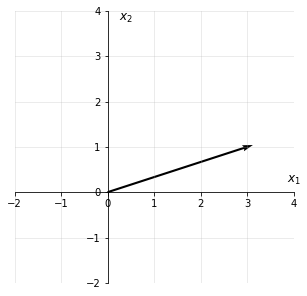

In [140]:
x = [3,1]

fig,ax = plt.subplots(1,figsize=(5,5))
ax = plot_setup(ax)
ax.scatter([0,x[0]],[0,x[1]],color='w')
ax.quiver(0,0,x[0],x[1],units='xy',angles='xy',scale=0.95) #quiver function is a bit temperamental with the scaling
plt.show()


Note that without a-priori specification, in linear algebra we almost always assume that the vector originates from the origin point $[0,0]$. It is also worth noting that points that lie in the 2D space above are said to exist in a *Cartesian coordinate system*; that is, any point in this space is defined by a unique combination of some $x_1$ and $x_2$ values (i.e., it cannot be described by either $x_1$ or $x_2$ alone). Therefore it is common to hear something like: "$x_1$ and $x_2$ are the *coordinates* of the vector $\pmb{x}$".

Some other important concepts of the vector include its magnitude (the length of the arrow), and orientation (the direction of the arrow). We can first find the length of the vector by solving Pythagoras' theorem. Notice how the end-point of the vector $[3,1]$ can be thought of as moving from the origin $[0,0]$ along the x-axis by 3, and then up the y-axis by 1. This then basically gives us a right-angled triangle where the magnitude of the vector $\pmb{x}$ is given by the hypotenuse $H$,

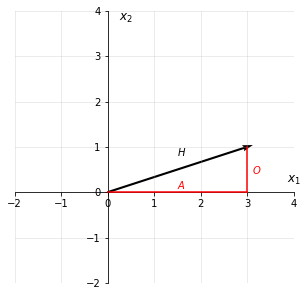

In [3]:
x = [3,1]

fig,ax = plt.subplots(1,figsize=(5,5))
ax = plot_setup(ax)
ax.quiver(0,0,x[0],x[1],units='xy',angles='xy',scale=0.95)
ax.plot([0,x[0]],[0,0],color='red',zorder=1000)
ax.plot([x[0],x[0]],[0,x[1]],color='red',zorder=1000)
ax.text(3.1,0.4,'$O$',color='red')
ax.text(1.5,0.07,'$A$',color='red')
ax.text(1.5,0.8,'$H$',color='k')
plt.show()

where $H = \sqrt{A^2 + O^2} = \sqrt{(3-0)^2 + (1-0)^2} = \sqrt{10}$. So we now know that the magnitude of this vector is $\sqrt{10}$, but what about its orientation? This can be computed as the angle from the horizontal plane (i.e, the angle between $A$ and $H$ above), given by trigonometry: $\theta = \cos^{-1}(A/H) = \cos^{-1}(3/\sqrt{10}) \approx 18.4^\circ$.

In most ML applications, we generally don't consider vectors to be more than just ordered lists of numbers, but it is worthwhile bearing the above principles in mind when we discuss concepts like linear independence later.

Notice also that in the above examples we assumed a 2D space for simplicity, however the same principles apply to any number of dimensions (our original example was a 10-dimensional vector!). As we can only visualise up to 3D spaces, let's just expand the above 2D case to 3D, such that our vector becomes $\pmb{x} = [x_1,x_2,x_3]$, but keep in mind that these concepts hold for larger dimensions

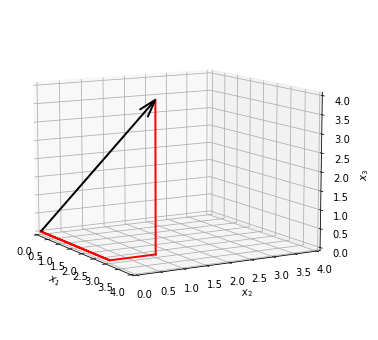

In [75]:
from mpl_toolkits.mplot3d import Axes3D

x = [3,1,4]

fig,ax = plt.subplots(1,figsize=(6,6),subplot_kw=dict(projection='3d'))
ax.plot([0,x[0],0],[0,0,0],[0,0,0],color='red',lw=2)
ax.plot([x[0],x[0],x[0]],[x[1],x[1],0],[0,0,0],color='red',lw=2)
ax.plot([x[0],x[0],x[0]],[x[1],x[1],x[1]],[0,0,x[2]],color='red',lw=2)
ax.quiver(0,0,0,x[0],x[1],x[2],color='k',lw=2,arrow_length_ratio=0.1)
ax.view_init(10, -30)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_xlim(0,4)
ax.set_ylim(0,4)
plt.show()

### Adding vectors

Now that we've defined what a vector is and how to represent one graphically, let's introduce how we can combine vectors by adding. This forms the basis of many ML algorithms.

Let's assume we now have a pair of 2-dimensional vectors $\pmb{x} = [3,1]$ and $\pmb{y} = [2,2]$, given by the black and teal arrows below respectively

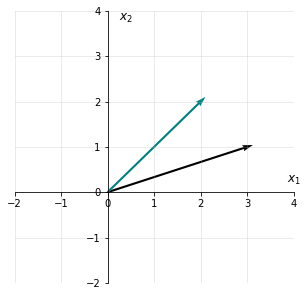

In [142]:
x = [3,1]
y = [2,2]

fig,ax = plt.subplots(1,figsize=(5,5))
ax = plot_setup(ax)
ax.scatter([0,x[0]],[0,x[1]],color='w')
ax.quiver(0,0,x[0],x[1],units='xy',angles='xy',scale=0.95)
ax.quiver(0,0,y[0],y[1],units='xy',angles='xy',scale=0.95,color='teal')
plt.show()

Our goal is now to combine these two vectors together (specifically, add them) to produce a new vector $\pmb{z}$. This is actually rather simple, all we do is add their individual components (coordinates):

\begin{equation}
\pmb{z} = \pmb{x} + \pmb{y} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = \begin{bmatrix} x_1 + y_1 \\ x_2 + y_2 \end{bmatrix}.
\end{equation}

Note that it is common practice to write vectors in the vertical, encased by square brackets.

Therefore our new vector is defined by the coordinates $[5,3]$.

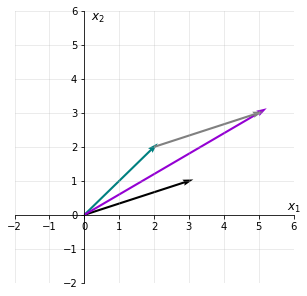

In [149]:
x = np.array([3,1]) #for doing mathematical operations we need to turn the list into a numpy array
y = np.array([2,2])
z = x + y

fig,ax = plt.subplots(1,figsize=(5,5))
ax = plot_setup(ax,[-2,6],[-2,6],[1,0.3],[0.3,0.95])
ax.scatter([0,x[0]],[0,x[1]],color='w')
ax.quiver(0,0,x[0],x[1],units='xy',angles='xy',scale=0.95)
ax.quiver(0,0,y[0],y[1],units='xy',angles='xy',scale=0.95,color='teal')
ax.quiver(0,0,z[0],z[1],units='xy',angles='xy',scale=0.95,color='darkviolet')
ax.quiver(y[0],y[1],z[0]-y[0],z[1]-y[1],units='xy',angles='xy',scale=0.95,color='grey')
plt.show()

In the image above we can see the new vector $\pmb{z}$ given by the violet arrow. Notice also that the addition of two vectors can be thought of as shifting the first vector $\pmb{x}$ so that it's origin now begins at the end of the second vector $\pmb{y}$ (shown by the grey arrow in the image above). The end point of this new shifted vector is equivalent to the coordinates of $\pmb{z}$.

### Scaling vectors

Another common operation in statistics is to simply multiply a vector by a scalar value, e.g., $\pmb{y} = 2\pmb{x}$. This has the effect of increasing the length of the vector arrow (i.e., its magnitude) for scalars greater than 1, and subsequently decreasing the length of the vector arrow for scalars less than 1. Let's see this in action

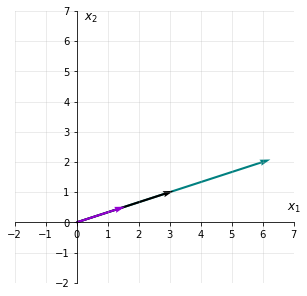

In [154]:
x = np.array([3,1])
y = 2*x
z = 0.5*x

fig,ax = plt.subplots(1,figsize=(5,5))
ax = plot_setup(ax,[-2,7],[-2,7],[1,0.3],[0.275,0.95])
ax.scatter([0,x[0]],[0,x[1]],color='w')
ax.quiver(0,0,y[0],y[1],units='xy',angles='xy',scale=0.95,color='teal') 
ax.quiver(0,0,x[0],x[1],units='xy',angles='xy',scale=0.95) 
ax.quiver(0,0,z[0],z[1],units='xy',angles='xy',scale=0.95,color='darkviolet') 
plt.show()

We can see that by *scaling* the original vector (black), it's length is either increased (teal), or decreased (violet), however the orientation of the vector remains the same. Therefore scaling is equivalent to multiplying each of the individual coordinates of the vector by this scalar value:

\begin{equation}
\pmb{y} = 2\pmb{x} = \begin{bmatrix} 2x_1 \\ 2x_2 \end{bmatrix}.
\end{equation}



### Basis vectors and linear combinations

The concepts of adding and scaling vectors brings us to an equivalent and alternative way of defining any arbitrary vector, and will set the stage for some extremley useful concepts later. Continuing with the 2D case, consider for a moment the two vectors $\pmb{i} = [1,0]$ and $\pmb{j} = [0,1]$:

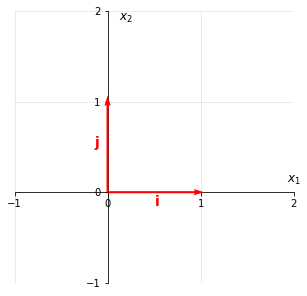

In [4]:
i = [1,0]
j = [0,1]

fig,ax = plt.subplots(1,figsize=(5,5))
ax = plot_setup(ax,[-1,2],[-1,2])
ax.scatter([0,j[0]],[0,j[1]],color='w')
ax.quiver(0,0,i[0],i[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
ax.quiver(0,0,j[0],j[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
ax.text(-0.15,0.5,'$\mathbf{j}$',color='r',fontsize=14)
ax.text(0.5,-0.15,'$\mathbf{i}$',color='r',fontsize=14)
plt.show()

These two vectors are known as *unit vectors* as they each have a magnitude of 1. Now recall how we mentioned that for an arbitrary 2D vector $\pmb{x} = [x_1,x_2]$, we can think of getting to its end-point by moving along the x-axis from the origin by $x_1$, and then moving up the y-axis by $x_2$. Alternatively, we can think of getting to this same point by scaling each of the unit vectors by the coordinates of $\pmb{x}$. In other words, we can describe the vector $\pmb{x}$ as the sum of two scaled (unit) vectors $\pmb{x} = x_1\pmb{i} + x_2\pmb{j}$:

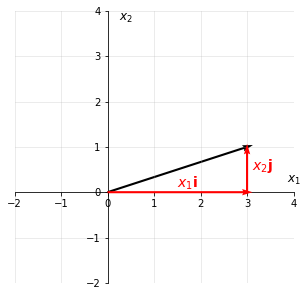

In [5]:
i = np.array([1,0])
j = np.array([0,1])
x = [3,1]

fig,ax = plt.subplots(1,figsize=(5,5))
ax = plot_setup(ax,[-2,4],[-2,4])
ax.scatter([0,x[0]],[0,x[1]],color='w')

ax.quiver(0,0,i[0]*x[0],i[1]*x[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
ax.quiver(x[0],0,j[0],x[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
ax.quiver(0,0,x[0],x[1],units='xy',angles='xy',scale=0.95,color='k')
ax.text(3.1,0.5,'$x_2\mathbf{j}$',color='r',fontsize=14)
ax.text(1.5,0.1,'$x_1\mathbf{i}$',color='r',fontsize=14)
plt.show()

This idea of summing multiple scaled vectors is known as a *linear combination of vectors*, and in the above example, the unit vectors $\pmb{i}$ and $\pmb{j}$ are known as the *basis vectors* of the 2D coordinate system that we have used to define $\pmb{x}$. Note however that this choice of such *unit* basis vectors was implicit, and instead we could explicitly choose any arbitrary set of basis vectors, such as $\pmb{u} = [1,2]$ and $\pmb{v} = [3,-1]$, and subsequently scale them by $\pmb{x} = [0.5,-1]$ to produce a linear combination of the two: $\pmb{y} = 0.5\pmb{u} - 1\pmb{v}$.

/var/folders/08/953_5x410x9d826lzpg5fc4h0000gp/T/ipykernel_69015/610648901.py:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pad" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('../images/vectors.png',dpi=400,bbox_inches='tight',pad=0.25)


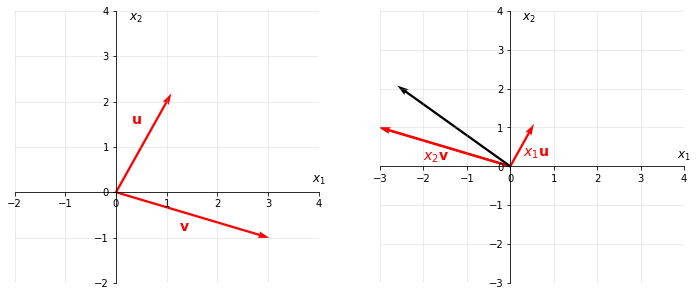

In [3]:
u = np.array([1,2])
v = np.array([3,-1])
x = [0.5,-1]
y = x[0]*u + x[1]*v

fig,ax = plt.subplots(1,2,figsize=(12,5))
ax1 = plot_setup(ax[0],[-2,4],[-2,4])
ax2 = plot_setup(ax[1],[-3,4],[-3,4],[1,0.49],[0.49,0.95])
ax1.scatter([0,u[0]],[0,u[1]],color='w')
ax1.quiver(0,0,u[0],u[1],units='xy',angles='xy',scale=0.95,color='r')
ax1.quiver(0,0,v[0],v[1],units='xy',angles='xy',scale=0.95,color='r')
ax1.text(.3,1.5,'$\mathbf{u}$',color='r',fontsize=14)
ax1.text(1.25,-0.85,'$\mathbf{v}$',color='r',fontsize=14)

ax2.scatter([0,u[0]],[0,u[1]],color='w')
ax2.quiver(0,0,u[0]*x[0],u[1]*x[0],units='xy',angles='xy',scale=0.95,color='r')
ax2.quiver(0,0,v[0]*x[1],v[1]*x[1],units='xy',angles='xy',scale=0.95,color='r')
ax2.quiver(0,0,v[0]*x[1],v[1]*x[1],units='xy',angles='xy',scale=0.95,color='r')
ax2.quiver(0,0,y[0],y[1],units='xy',angles='xy',scale=0.95,color='k')
ax2.text(.3,.25,'$x_1\mathbf{u}$',color='r',fontsize=14)
ax2.text(-2,0.15,'$x_2\mathbf{v}$',color='r',fontsize=14)
plt.savefig('../images/vectors.png',dpi=400,bbox_inches='tight',pad=0.25)
plt.show()

This idea of linear combinations of vectors is very powerful because from a pair of non-zero vectors $\pmb{u}$ and $\pmb{v}$, whose orientation are not equal (i.e., $\pmb{u} \neq c\pmb{v}$ where $c$ is a scalar), we can generate *any* new vector in the space of $\pmb{u}$ and $\pmb{v}$ by their linear combination $a\pmb{u} + b\pmb{v}$. Speaking more generally, for a given set of vectors, the set of new possible vectors that can be generated via linear combinations of the original set is known as the *span* of the original set of vectors. 

As an example, let's simplify our previous vector diagrams by just plotting their end-points rather than the full arrows. In the diagram below, the red dots represent the vectors $\pmb{u} = [1,2]$ and $\pmb{v} = [3,-1]$, and the black dots represent new vectors generated by linear combinations of $\pmb{u}$ and $\pmb{v}$, for some arbitrary scalar values $a$ and $b$. We can already see how much of the 2D space we can reach just by this specific set of scalar values. What is perhaps noticeable here is that if we used every conceviable value from $-\infty$ to $\infty$ for $a$ and $b$, we could in principle sample the entire 2D space of vectors just from this linear combination of $\pmb{u}$ and $\pmb{v}$. Therefore we can say that the *span* of the vectors $\pmb{u}$ and $\pmb{v}$ is the set of all vectors in 2D space.



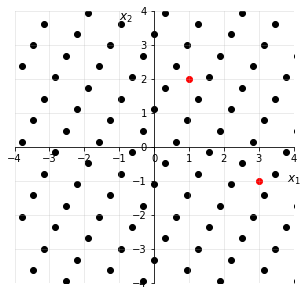

In [281]:
u = np.array([1,2])
v = np.array([3,-1])
a = np.linspace(-3,3,20)
b = np.linspace(-3,3,20)
lin_comb = [a[n1]*u + b[n2]*v for n1 in range(len(a)) for n2 in range(len(b))]

fig,ax = plt.subplots(1,figsize=(5,5))
ax = plot_setup(ax,[-4,4],[-4,4])
ax.scatter(u[0],u[1],color='r')
ax.scatter(v[0],v[1],color='r')
for new_vector in lin_comb:
    ax.scatter(new_vector[0],new_vector[1],color='k')
plt.show()

### Linear dependence

Let's think a bit more about the case where our two basis vectors have the same orientation, i.e., $\pmb{u} = c\pmb{v}$. Consider the following example where $\pmb{u} = [1,2]$ and $\pmb{v} = [-1,-2]$, such that $\pmb{u} = -1\pmb{v}$. If we then repeat the same exercise above, where we wish to create new vectors based on the linear combinations of $\pmb{u}$ and $\pmb{v}$ we get the following:

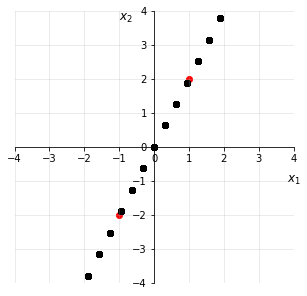

In [283]:
u = np.array([1,2])
v = np.array([-1,-2])
a = np.linspace(-3,3,20)
b = np.linspace(-3,3,20)
lin_comb = [a[n1]*u + b[n2]*v for n1 in range(len(a)) for n2 in range(len(b))]

fig,ax = plt.subplots(1,figsize=(5,5))
ax = plot_setup(ax,[-4,4],[-4,4])
ax.scatter(u[0],u[1],color='r')
ax.scatter(v[0],v[1],color='r')
for new_vector in lin_comb:
    ax.scatter(new_vector[0],new_vector[1],color='k')
plt.show()

We notice here that the span of these two vectors is just a line. This makes sense because the vector $\pmb{v}$ is just a scaled version (i.e., a linear combination) of $\pmb{u}$ and vice versa. Another way of thinking about this is that $\pmb{v}$ is effectively redundant as it does not increase the span that we already get from $\pmb{u}$. The two vectors $\pmb{u}$ and $\pmb{v}$ are then said to be *linearly dependent*. On the other hand if a new vector which is added to an existing set of vectors increases the span then it is said to be *linearly independent* of the other vectors.

### Upcoming...

Now that we have a feel for vectors and vector operations, the next notebook will discuss concepts relating to matrices and linear transformations